# Linear Regression and gradient descent from scratch

This notebook was created as part of udacity deep learning nano degree! see more at [Udacity](https://br.udacity.com/course/deep-learning-nanodegree-foundation--nd101).

Based at Siraj Raval's [live session at YouTube](https://www.youtube.com/watch?v=XdM6ER7zTLk).

## Python version

This example will work with bouth python 2 and 3 versions.

In [123]:
from __future__ import print_function # COMMENT THIS LINE FOR PYTHON 3

import pandas as pd
import numpy
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

%matplotlib notebook

## Read data

This notebook is using a csv file provided by Siraj.
Data is related to tests score and amount of study. The idea of this notebook is use test score to predict the amount of study.

In [128]:
data_frame = pd.read_csv('./data.csv', header=None)
data_frame.columns = ['Test Score', 'Amount of Study']
data_frame.head()

,Test Score,Amount of Study
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


### Spliting data

Bellow I'm splitting the data frame to create a list of data and their labels.
We will have 2 Pandas Series to be used at newral network. 

In [129]:
data = data_frame['Test Score']
labels = data_frame['Amount of Study']

## Network Hyperparameters

Hyperparameters are used to tune the network. The hyperparameters are:

* learning_rate: This parameter is used to control how fast the network should learn. If this parameter it too big the network will never coonverge and if it is too small the network will learn too slow

* initial_b: The b is called as bias and is shared between all features (training data) and represents how easy is to the network has a positive result.

* initial_m: The m (or w) is used for feature weight. Every feature has it's own weight to represents it's importance to the network.

* num_iterations: This param is used to define how much times the network should run the trainment with the dataset

In [112]:
learning_rate = 0.0001
initial_b = 0
initial_m = 0
num_iterations = 10

## Helper function to calculate error

This is a helper function to calculate the error for all predictions.<br>
This function is using squared error formula: $Error = \frac{1}{n} \sum(Y - (m * x + b))^{2}$ where:

* y is target
* m is is feature weight
* x is a feature
* b is bias
* n is number of entries

In [86]:
def compute_error_for_given_points(b, m, data, labels):
    # linear formula: m * x + b
    calculated_y = m * data + b
    
    # error formula: 1/n * (sum(y - (m * x + b)) ** 2)
    squared_error = (labels - calculated_y) ** 2
    return sum(squared_error) / len(squared_error)

## Newral Network

This network is a simple linear regression network. For every iteration we are calculating error and printing it.

### Gradient decent

To understand how gradient descent works you can take a look at image bellow:
![Gradient descent](https://raw.githubusercontent.com/mattnedrich/GradientDescentExample/master/gradient_descent_example.gif)

The idea of gradient descent is calculate the error of network output and use this value to update weights and biases to improve network acurace. This is done by some expressions:<br>

<center>**Linear Regression Expression**</center>
$$ 
\Delta Y = m * x + b
$$
<br><br>

<center>**Error Expression**</center>
$$ 
Error = \frac{1}{n} \sum(Y - (m * x + b))
$$
<center>*As you can see we are not squaring error for this network. We are using partial derivative for this netork*</center>
<br><br>

<center>**Partial detivatives for weight and bias**</center>
$$ 
\frac{\partial }{\partial m} = \frac{2}{N} \sum_{i=1}^{N} - x_i(y_i - (mx_i + b))
$$
$$ 
\frac{\partial }{\partial b} = \frac{2}{N} \sum_{i=1}^{N} - (y_i - (mx_i + b))
$$

In [113]:
error_list = []

# Calculationg initial error
error_list.append(compute_error_for_given_points(initial_b, initial_m, data, labels))
print("starting gradient descent at b ={0}, m = {1} and error = {2}".format(initial_b, initial_m, error_list[-1]))

                                               
# Running neural network
b, m, n = initial_b, initial_m, float(len(data))

for i in range(num_iterations):
    
    # Calculating linear regression
    linear_regression = ( m * data ) + b
    
    # Calculating error and partial derivativer for hyperparamets
    error = labels - linear_regression
    
    partial_b = -(2/n) * (labels - linear_regression)
    partial_m = -(2/n) * data * (labels - linear_regression)
    
    b_gradient = sum(partial_b)
    m_gradient = sum(partial_m)
    
    # updating hyper paramiters at gradient descent
    b = b - (learning_rate * b_gradient)
    m = m - (learning_rate * m_gradient)
    
    error_list.append(compute_error_for_given_points(b, m, data, labels))
    print("Partial gradient descent at b ={0}, m = {1} and error = {2}".format(b, m, error_list[-1]))
    
print("Final gradient descent at b ={0}, m = {1} and error = {2}".format(b, m, error_list[-1]))

starting gradient descent at b =0, m = 0 and error = 5565.10783448
Partial gradient descent at b =0.0145470101107, m = 0.737070297359 and error = 1484.58655741
Partial gradient descent at b =0.0218739629596, m = 1.10679545435 and error = 457.854257574
Partial gradient descent at b =0.0255792243213, m = 1.29225466491 and error = 199.509985726
Partial gradient descent at b =0.0274677895591, m = 1.38528325565 and error = 134.505910582
Partial gradient descent at b =0.0284450719817, m = 1.43194723238 and error = 118.149693422
Partial gradient descent at b =0.0289652407665, m = 1.4553540089 and error = 114.03414906
Partial gradient descent at b =0.029256114126, m = 1.46709461772 and error = 112.998577317
Partial gradient descent at b =0.0294319691638, m = 1.47298329822 and error = 112.737981876
Partial gradient descent at b =0.0295501290244, m = 1.4759365619 and error = 112.672384359
Partial gradient descent at b =0.0296393478747, m = 1.47741737555 and error = 112.655851815
Final gradient d

## Visualize results

### Gradient descent error
This char has the error after every iteration. Gradient descent is very visible here. After every iteration we apply gradient descent algorithm to reduce network error

<IPython.core.display.Javascript object>


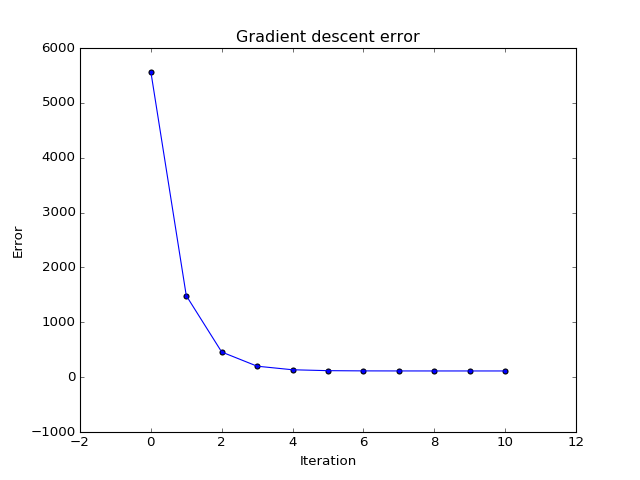

In [137]:
plt.scatter(range(len(error_list)), error_list)
plt.plot(error_list)

plt.title('Gradient descent error')
plt.ylabel('Error')
plt.xlabel('Iteration')

plt.show()

### Real Labels VS Prediction

This chart shows the diference between the real labels and the prediction. Ther are pretty close after trainment.

<IPython.core.display.Javascript object>


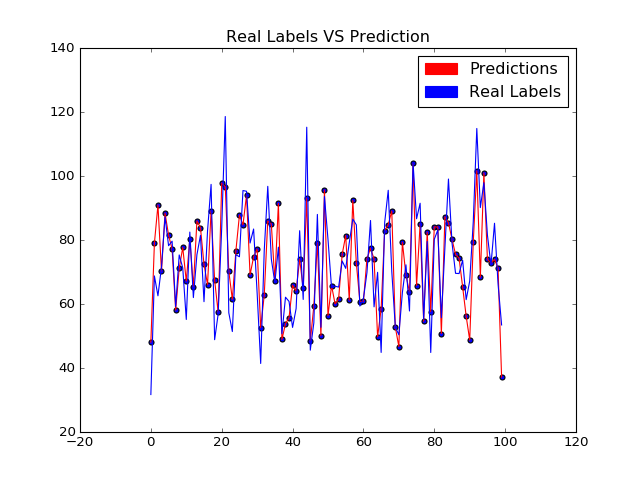

In [136]:
predictions = m * data + b

plt.scatter(range(len(predictions)), predictions)
plt.plot(predictions, 'r')
plt.plot(labels, 'b')

plt.title('Real Labels VS Prediction')

predictions_patch = mpatches.Patch(color='red', label='Predictions')
real_labels_patch = mpatches.Patch(color='blue', label='Real Labels')
plt.legend(handles=[predictions_patch, real_labels_patch])

plt.show()